In [4]:
from scripts.cross_validation_script import Cross_Validation
import matplotlib.pyplot as plt
import numpy as np

In [5]:
kwargs = {'ndim': 1, 'ntrees': 100}#, 'scoring_metric': 'depth'}

In [3]:
oww = Cross_Validation(kfold=5, model_parameters=kwargs, sigkey='ttHto2B')#'SMS-Higgsino')
# FPR, TPR, AUC = Cross_Validation(kfold=5, model_parameters=kwargs, sigkey='SMS-Higgsino').predict_value()

In [6]:
mean_curve ={}
error_curve={}
base ={}
auc_mean={} 
auc_unc={}
scoring_metrics = ['depth', 'density', 'adj_depth', 'adj_density', 'boxed_ratio', 'boxed_density2', 'boxed_density']

for idx, score in enumerate(scoring_metrics):
    kwargs['scoring_metric'] = score
    mean_curve[idx], error_curve[idx], base[idx], auc_mean[idx], auc_unc[idx] = Cross_Validation(kfold=5, model_parameters=kwargs, sigkey='SUSYGluGluToBBHToBB_NarrowWidth_M-120').get_kfold_uncertainty()
    print(f'{score} done!')

depth done!
density done!
adj_depth done!
adj_density done!
boxed_ratio done!
boxed_density2 done!
boxed_density done!


In [7]:
import pickle

# Assume mean_curve, error_curve, base, auc_mean, auc_unc are your dictionaries

# Save dictionaries to file
with open('fivefold_scoringmerticscan_values/fivefold_scoringmetric_SUSYGluGluToBBHToBB_NarrowWidth_M-120.pkl', 'wb') as f:
    pickle.dump(mean_curve, f)
    pickle.dump(error_curve, f)
    pickle.dump(base, f)
    pickle.dump(auc_mean, f)
    pickle.dump(auc_unc, f)

print("Data saved successfully.")

Data saved successfully.


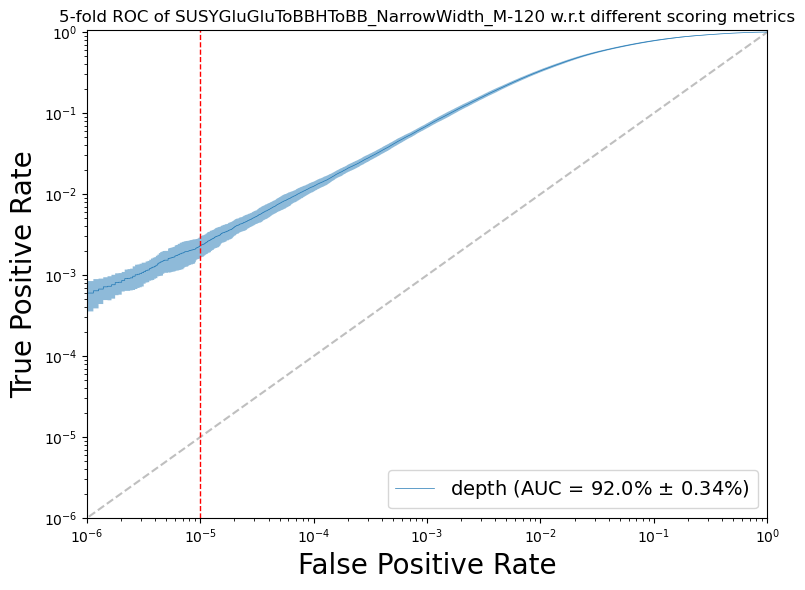

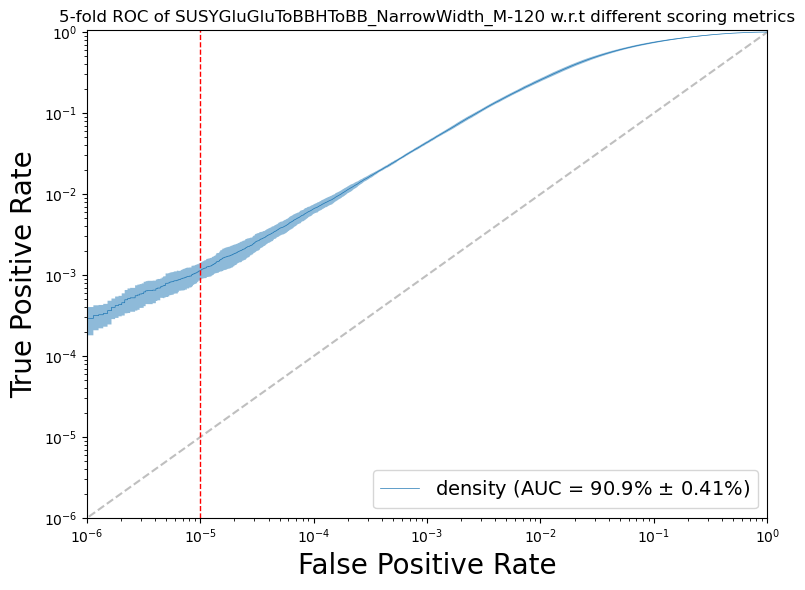

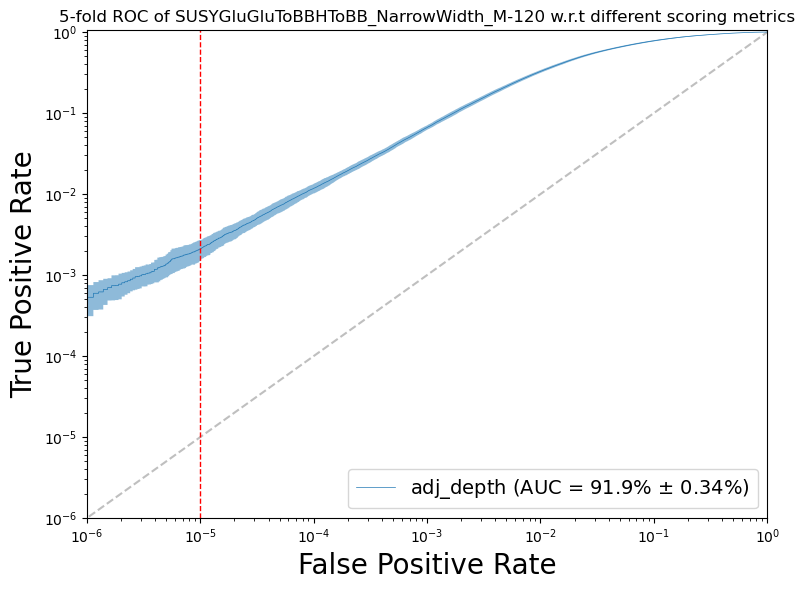

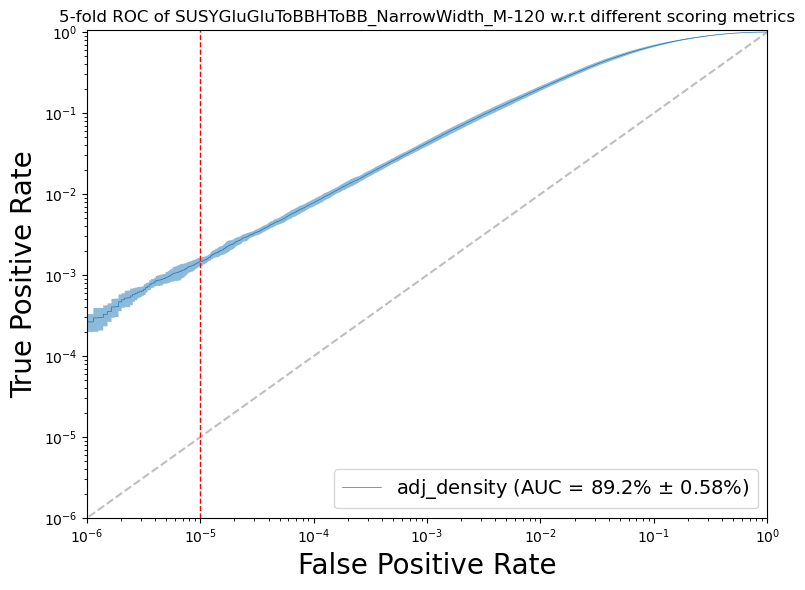

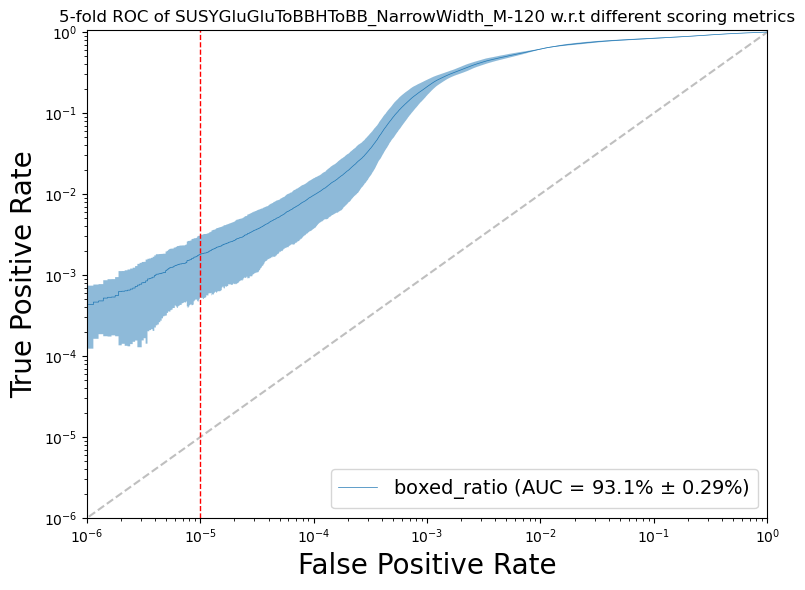

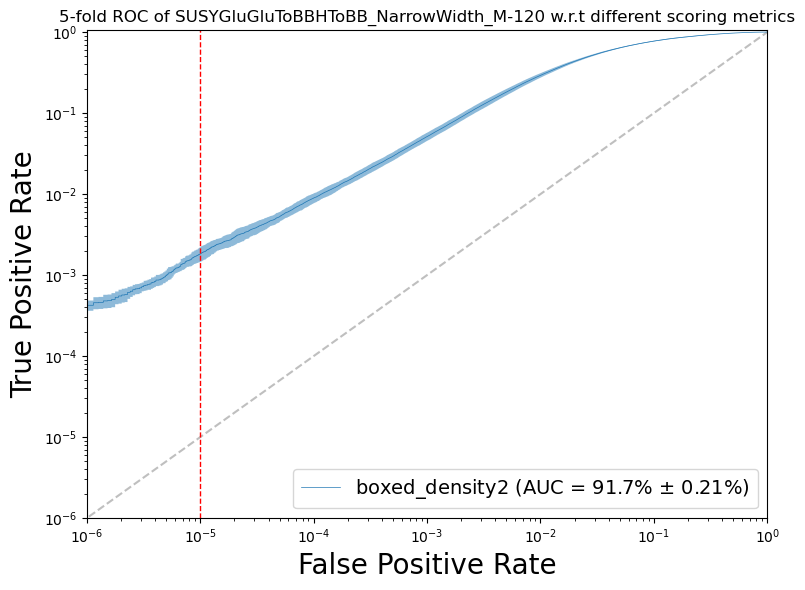

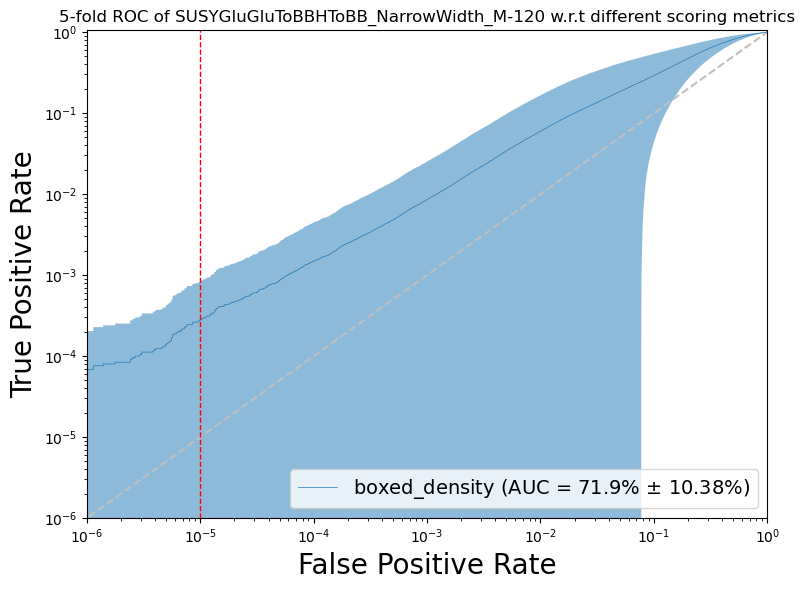

In [10]:
#plt.title('BB')

scoring_metrics = ['depth', 'density', 'adj_depth', 'adj_density', 'boxed_ratio', 'boxed_density2', 'boxed_density']
#scoring_metrics = ['adj_depth', 'adj_density', 'boxed_density', 'boxed_density2', 'boxed_ratio', 'depth']

  
for idx, score in enumerate(scoring_metrics): 
     plt.figure(figsize=(8, 6))
     plt.plot(np.linspace(0, 1), np.linspace(0, 1), '--', color='0.75')
     plt.plot(base[idx],mean_curve[idx], linewidth=0.5,  label=f'{score} (AUC = %.1f%% $\pm$ %.2f%%)' % (auc_mean[idx] * 100, auc_unc[idx] * 100))
     plt.fill_between(base[idx],
                mean_curve[idx] - error_curve[idx],
                mean_curve[idx] + error_curve[idx],
                alpha=0.5)

     plt.xlabel('False Positive Rate',fontsize=20)
     plt.ylabel('True Positive Rate',fontsize=20)

     plt.title('5-fold ROC of SUSYGluGluToBBHToBB_NarrowWidth_M-120 w.r.t different scoring metrics')

     plt.semilogx()
     plt.semilogy()
     plt.xlim([10**-(6), 1.0])
     plt.ylim([10**-(6), 1.05])

     plt.legend(loc='lower right',fontsize=14)
     plt.tight_layout()
     plt.axvline(0.00001, color='red', linestyle='dashed', linewidth=1) # threshold value for measuring anomaly detection efficiency
     plt.savefig(f'{score}')
     #plt.savefig('all SUSYGluGluToBBHToBB_NarrowWidth_M-120 minus boxed_density')
     plt.show()

In [2]:
from scripts import dataset

In [3]:
kwargs = {'ndim': 1, 'ntrees': 100, 'scoring_metric': 'depth'}
CV = Cross_Validation(kfold=5, model_parameters=kwargs, sigkey='ttHto2B').get_model_name()

In [4]:
BB = dataset.load_dataset('BSM_preprocessed.h5', 'ttHto2B')
x_train, x_test = dataset.create_xtrain_xtest()

In [5]:
import pickle
model = pickle.load(open(CV[0], 'rb'))

In [8]:
import matplotlib.pyplot as plt

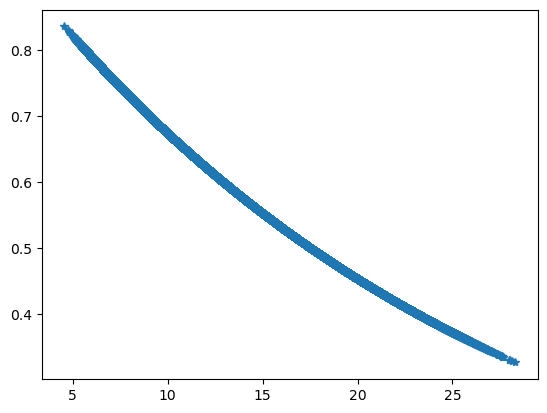

In [10]:
depth_anom = model.predict(BB, output="avg_depth")
score_anom = model.predict(BB, output="score")
plt.plot(depth_anom, score_anom, '*')

In [6]:
depth = model.predict(x_test, output="avg_depth")
score = model.predict(x_test, output="score")

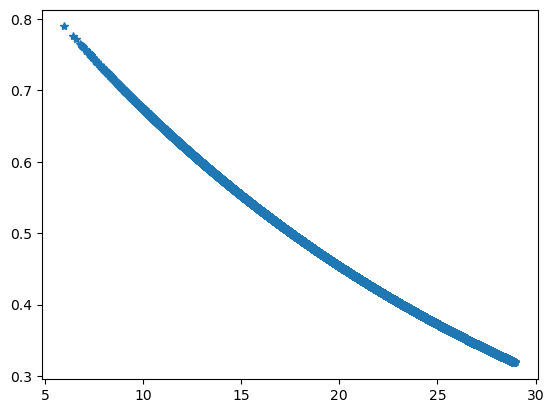

In [9]:
plt.plot(depth, score, '*')

In [15]:
import matplotlib.pyplot as plt
import numpy as np

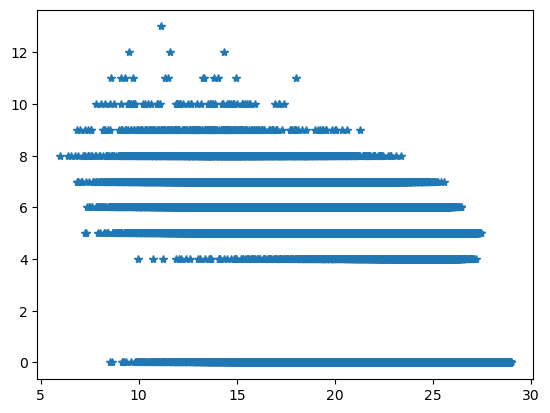

In [45]:
plt.plot(depth, x_test[:,21], '*')

In [20]:
np.shape(x_test[:,0]) == np.shape(depth)

True

In [40]:
# df_main = pd.read_csv("main_dataset.csv")
# df_separate = pd.read_csv("separate_dataset.csv")

# # Calculate the correlation coefficients between each attribute and the separate dataset parameter
correlations = []
for i in range(99):
    correlation = np.corrcoef(x_test[:, i], depth.squeeze())
    correlations.append((i, correlation))

# # Sort the correlations in descending order
# correlations.sort(key=lambda x: abs(x[1]), reverse=True)

# # Print the attribute with the highest correlation
# print("Attribute with the highest correlation with the separate dataset parameter:")
# print(correlations[0])

/Users/jessicaprendi/opt/anaconda3/envs/SP/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/jessicaprendi/opt/anaconda3/envs/SP/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [43]:
correlations

[(0,
  array([[ 1.        , -0.21508654],
         [-0.21508654,  1.        ]])),
 (1,
  array([[nan, nan],
         [nan,  1.]])),
 (2,
  array([[1.        , 0.03333673],
         [0.03333673, 1.        ]])),
 (3,
  array([[ 1.        , -0.38077849],
         [-0.38077849,  1.        ]])),
 (4,
  array([[1.        , 0.00685261],
         [0.00685261, 1.        ]])),
 (5,
  array([[ 1.        , -0.04073573],
         [-0.04073573,  1.        ]])),
 (6,
  array([[ 1.        , -0.51108226],
         [-0.51108226,  1.        ]])),
 (7,
  array([[1.        , 0.01168286],
         [0.01168286, 1.        ]])),
 (8,
  array([[ 1.        , -0.16155097],
         [-0.16155097,  1.        ]])),
 (9,
  array([[ 1.        , -0.55439126],
         [-0.55439126,  1.        ]])),
 (10,
  array([[1.       , 0.0015385],
         [0.0015385, 1.       ]])),
 (11,
  array([[ 1.        , -0.30028388],
         [-0.30028388,  1.        ]])),
 (12,
  array([[ 1.        , -0.58880969],
         [-0.58880969, 

In [ ]:
kwargs = {'ndim': 1, 'ntrees': 100, 'scoring_metric': 'depth'}
CV = Cross_Validation(kfold=5, model_parameters=kwargs, sigkey='ttHto2B').get_model_name()

In [ ]:
BB = dataset.load_dataset('BSM_preprocessed.h5', 'ttHto2B')
x_train, x_test = dataset.create_xtrain_xtest()

In [ ]:
import pickle
import shap

In [ ]:
model = pickle.load(open(CV[0], 'rb'))
score = model.predict(BB, output="score")

In [ ]:
explainer = shap.TreeExplainer(model)


In [ ]:
pred = model.predict(Xd, output_margin=True)

explainer = shap.TreeExplainer(model)
explanation = explainer(Xd)

shap_values = explanation.values
# make sure the SHAP values add up to marginal predictions
np.abs(shap_values.sum(axis=1) + explanation.base_values - pred).max()

In [ ]:
model=IsolationForest(n_estimators=100).fit(x_train)

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
explainer = shap.Explainer(model)
sample_instance = BB
shap_values = explainer(sample_instance)

In [ ]:
import lime
from lime import lime_tabular

In [ ]:
explainer = lime_tabular.LimeTabularExplainer(BB)#,feature_names= feature_names,class_names=['Normal', 'Anomaly'])

In [ ]:
explanation = explainer.explain_instance(x_test, model.decision_function, num_features=99)

In [ ]:
import numpy as np

np.shape(BB)

In [ ]:
instance = new_data.loc[[12]]
shap_instance = explainer.shap_values (instance)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_instance, instance)

In [ ]:
oww = list(dataset.bsm_keys())

In [ ]:
len(oww)

In [ ]:
kwargs = {'ndim': 1, 'ntrees': 100}#, 'scoring_metric': 'density'}
scoring_metrics = ['depth', 'density', 'adj_depth', 'adj_density', 'boxed_ratio', 'boxed_density2', 'boxed_density']

for score in scoring_metrics:
    kwargs['scoring_metric'] = score
    Cross_Validation(kfold=5, model_parameters=kwargs, sigkey='VBFHToInvisible').train_k_models()

In [ ]:
mean_curve ={}
error_curve={}
base ={}
auc_mean={} 
auc_unc={}
scoring_metrics = ['depth', 'density', 'adj_depth', 'adj_density', 'boxed_ratio', 'boxed_density2', 'boxed_density']

for idx, score in enumerate(scoring_metrics):
    kwargs['scoring_metric'] = score
    mean_curve[idx], error_curve[idx], base[idx], auc_mean[idx], auc_unc[idx] = Cross_Validation(kfold=5, model_parameters=kwargs, sigkey='VBFHToInvisible').get_kfold_uncertainty()
    print(f'{score} done!')

In [ ]:
import pickle

# Assume mean_curve, error_curve, base, auc_mean, auc_unc are your dictionaries

# Save dictionaries to file
with open('fivefold_scoringmerticscan_values/fivefold_scoringmetric_VBFHToInvisible.pkl', 'wb') as f:
    pickle.dump(mean_curve, f)
    pickle.dump(error_curve, f)
    pickle.dump(base, f)
    pickle.dump(auc_mean, f)
    pickle.dump(auc_unc, f)

print("Data saved successfully.")


In [ ]:
import pickle

# Load dictionaries from file
with open('fivefold_scoringmerticscan_values/fivefold_scoringmetric_VBFHToInvisible.pkl', 'rb') as f:
    mean_curve = pickle.load(f)
    error_curve = pickle.load(f)
    base = pickle.load(f)
    auc_mean = pickle.load(f)
    auc_unc = pickle.load(f)

print("Data loaded successfully.")


In [ ]:
for idx, score in enumerate(scoring_metrics):
    kwargs['scoring_metric'] = score
    mean_curve[idx], error_curve[idx], base[idx], auc_mean[idx], auc_unc[idx] = Cross_Validation(kfold=5, model_parameters=kwargs, sigkey='GluGluHToGG_M-90').get_kfold_uncertainty()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#plt.title('BB')



scoring_metrics = ['depth', 'density', 'adj_depth', 'adj_density', 'boxed_ratio', 'boxed_density2', 'boxed_density']
#scoring_metrics = ['adj_depth', 'adj_density', 'boxed_density', 'boxed_density2', 'boxed_ratio', 'depth']

for idx, score in enumerate(scoring_metrics): 

    plt.figure(figsize=(8, 6))
    plt.plot(np.linspace(0, 1), np.linspace(0, 1), '--', color='0.75')
    plt.plot(base[idx],mean_curve[idx], linewidth=0.5,  label=f'{score} (AUC = %.1f%% $\pm$ %.2f%%)' % (auc_mean[idx] * 100, auc_unc[idx] * 100))
    plt.fill_between(base[idx],
                mean_curve[idx] - error_curve[idx],
                mean_curve[idx] + error_curve[idx],
                alpha=0.5)

    plt.xlabel('False Positive Rate',fontsize=20)
    plt.ylabel('True Positive Rate',fontsize=20)

    plt.title('5-fold ROC of VBFHToInvisible w.r.t different scoring metrics')

    plt.semilogx()
    plt.semilogy()
    plt.xlim([10**-(6), 1.0])
    plt.ylim([10**-(6), 1.05])

    plt.legend(loc='lower right',fontsize=14)
    plt.tight_layout()
    plt.axvline(0.00001, color='red', linestyle='dashed', linewidth=1) # threshold value for measuring anomaly detection efficiency
    plt.savefig(f'{score}')
    #plt.savefig('all minus boxed_density')
    plt.show()

In [24]:
kwargs = {'ndim': 1, 'ntrees': 100, 'scoring_metric': 'boxed_ratio'}
#scoring_metrics = ['depth', 'density', 'adj_depth', 'adj_density', 'boxed_ratio', 'boxed_density2', 'boxed_density']

In [25]:
ogg = Cross_Validation(kfold=5, model_parameters=kwargs, sigkey='ggXToYYTo2Mu2E_m18')

In [1]:
model_names = "trained_models/model__" + "__".join([f"{key}_{value}" for key, value in kwargs.items()])+"_*"+"fold"+"*"

NameError: name 'kwargs' is not defined

In [31]:
model_names

'trained_models/model__ndim_1__ntrees_100__scoring_metric_boxed_ratio_*fold*'

In [32]:
import glob

In [33]:
list(glob.glob(model_names))

['trained_models/model__ndim_1__ntrees_100__scoring_metric_boxed_ratio__fold_5_of_5',
 'trained_models/model__ndim_1__ntrees_100__scoring_metric_boxed_ratio__fold_4_of_5',
 'trained_models/model__ndim_1__ntrees_100__scoring_metric_boxed_ratio__fold_3_of_5',
 'trained_models/model__ndim_1__ntrees_100__scoring_metric_boxed_ratio__fold_2_of_5',
 'trained_models/model__ndim_1__ntrees_100__scoring_metric_boxed_ratio__fold_1_of_5']

In [14]:
model_list = ogg.get_model_name()


In [16]:
model_list

[]

In [ ]:
fpr = {}
tpr = {}
auc = {}

In [ ]:
ogg.cross_val_splits()

In [ ]:
for idx, mdl in enumerate(model_list):
    fpr[idx], tpr[idx], auc[idx] = ogg.predict_value(model=mdl)
    

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0, 1), np.linspace(0, 1), '--', color='0.75')
for idx, score in enumerate(model_list): 
    plt.plot(fpr[idx],tpr[idx], linewidth=0.5,  label=f'{idx} (AUC = %.1f%% )' % (auc[idx] * 100))

#for num in range(7):
num = 4
plt.plot(base[num], mean_curve[num], linewidth=2, label='mean')

plt.fill_between(base[num],
                mean_curve[num] - error_curve[num],
                mean_curve[num] + error_curve[num],
                alpha=0.5, label='standard deviation')

plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)

plt.title('5-fold ROC of ggXToYYTo2Mu2E_m18 w. scoring metric boxed_ratio')

plt.semilogx()
plt.semilogy()
plt.xlim([10**-(6), 1.0])
plt.ylim([10**-(6), 1.05])

plt.legend(loc='lower right',fontsize=14)
plt.tight_layout()
plt.axvline(0.00001, color='red', linestyle='dashed', linewidth=1) # threshold value for measuring anomaly detection efficiency
#plt.savefig(f'{score}')
plt.savefig('boxed_ratio all')
plt.show()



In [ ]:
import pickle

# Load dictionaries from file
with open('fivefold_scoringmerticscan_values/fivefold_scoringmetric_ggXToYYTo2Mu2E_m18.pkl', 'rb') as f:
    mean_curve = pickle.load(f)
    error_curve = pickle.load(f)
    base = pickle.load(f)
    auc_mean = pickle.load(f)
    auc_unc = pickle.load(f)

print("Data loaded successfully.")


In [ ]:
    def predict_value(self, model, output1="score"): #works!  # maybe need to indicate which fold we're at ????
        loaded_model = pickle.load(open(model, 'rb'))
        x_test, labels = self.get_testset_labels()
        score_x_test = loaded_model.predict(x_test, output=output1)
        FPR, TPR, _ = roc_curve(labels, score_x_test)
        AUC = auc(FPR, TPR)
        return FPR, TPR, AUC

In [ ]:
mean_curve, error_curve, base, auc_mean, auc_unc = okk.get_kfold_uncertainty()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plot_auroc_unc_(mean_curve, error_curve, base, auc_mean, auc_unc)

In [ ]:
def plot_auroc_unc_(mean_curve, error_curve, base, auc_mean, auc_unc): 
    plt.title('BB')
    plt.plot(base,mean_curve, linewidth=0.5,  label='depth (AUC = %.1f%% $\pm$ %.1f%%)' % (auc_mean * 100, auc_unc * 100))
    plt.semilogx()
    plt.semilogy()
    plt.fill_between(base,
                mean_curve - error_curve,
                mean_curve + error_curve,
                alpha=0.5)
    plt.legend(loc='lower right',fontsize=15)

In [ ]:
kwargs = {'ndim': 1, 'ntrees': 100, 'scoring_metric': 'density'}
okk = Cross_Validation(kfold=3, model_parameters=kwargs, sigkey='GluGluHToTauTau')
okk.train_k_models()
#oo,ll = okk.get_testset_labels()

In [ ]:
okk.train_and_save_model()


In [ ]:
FPR, TPR, AUC = okk.predict_value()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(FPR, TPR)
plt.semilogx()
plt.semilogy()

In [ ]:
okk.sig